<a href="https://colab.research.google.com/github/agusnarestha/kNN/blob/main/Tugas3_1301180268.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mengimport File Diabetes.csv

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

dataset = pd.read_csv('Diabetes.csv')
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
760,2,88,58,26,16,28.4,0.766,22,0
761,9,170,74,31,0,44.0,0.403,43,1
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0


Melakukan Normalisasi

In [192]:
dataset['Pregnancies'] = (dataset['Pregnancies']-dataset['Pregnancies'].min())/(dataset['Pregnancies'].max()-dataset['Pregnancies'].min())
dataset['Glucose'] = (dataset['Glucose']-dataset['Glucose'].min())/(dataset['Glucose'].max()-dataset['Glucose'].min())
dataset['BloodPressure'] = (dataset['BloodPressure']-dataset['BloodPressure'].min())/(dataset['BloodPressure'].max()-dataset['BloodPressure'].min())
dataset['SkinThickness'] = (dataset['SkinThickness']-dataset['SkinThickness'].min())/(dataset['SkinThickness'].max()-dataset['SkinThickness'].min())
dataset['Insulin'] = (dataset['Insulin']-dataset['Insulin'].min())/(dataset['Insulin'].max()-dataset['Insulin'].min())
dataset['BMI'] = (dataset['BMI']-dataset['BMI'].min())/(dataset['BMI'].max()-dataset['BMI'].min())
dataset['DiabetesPedigreeFunction'] = (dataset['DiabetesPedigreeFunction']-dataset['DiabetesPedigreeFunction'].min())/(dataset['DiabetesPedigreeFunction'].max()-dataset['DiabetesPedigreeFunction'].min())
dataset['Age'] = (dataset['Age']-dataset['Age'].min())/(dataset['Age'].max()-dataset['Age'].min())
dataset

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1
...,...,...,...,...,...,...,...,...,...
760,0.117647,0.442211,0.475410,0.262626,0.018913,0.423249,0.293766,0.016667,0
761,0.529412,0.854271,0.606557,0.313131,0.000000,0.655738,0.138770,0.366667,1
762,0.529412,0.447236,0.508197,0.000000,0.000000,0.335320,0.027327,0.200000,0
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000,0


Dataset

In [198]:
dataset_1_train = dataset.iloc[:612]
dataset_1_test = dataset.iloc[612:]

In [194]:
dataset_1_train = dataset.iloc[:612]
dataset_1_test = dataset.iloc[612:]

dataset_2_train1 = dataset.iloc[:459]
dataset_2_train2 = dataset.iloc[642:]
Con = [dataset_2_train1, dataset_2_train2]
dataset_2_train = pd.concat(Con)
dataset_2_test = dataset.iloc[459:642]

dataset_3_train1 = dataset.iloc[:306]
dataset_3_train2 = dataset.iloc[459:]
Con = [dataset_3_train1, dataset_3_train2]
dataset_3_train = pd.concat(Con)
dataset_3_test = dataset.iloc[306:459]

dataset_4_train1 = dataset.iloc[:153]
dataset_4_train2 = dataset.iloc[306:]
Con = [dataset_4_train1, dataset_4_train2]
dataset_4_train = pd.concat(Con)
dataset_4_test = dataset.iloc[153:306]

dataset_5_train = dataset.iloc[153:]
dataset_5_test = dataset.iloc[:153]

Menghitung Jarak

In [195]:
def knn(dataset_train,dataset_test,K):
  akurasi = 0
  for i in range(len(dataset_test)):
    dataset_train_copy = dataset_train.copy()

    dataset_train_copy['Distance'] = np.sqrt(pow(dataset_test.iloc[i,0] - dataset_train_copy['Pregnancies'],2)
                                      + pow(dataset_test.iloc[i,1] - dataset_train_copy['Glucose'],2) 
                                      + pow(dataset_test.iloc[i,2] - dataset_train_copy['BloodPressure'],2)
                                      + pow(dataset_test.iloc[i,3] - dataset_train_copy['SkinThickness'],2) 
                                      + pow(dataset_test.iloc[i,4] - dataset_train_copy['Insulin'],2) 
                                      + pow(dataset_test.iloc[i,5] - dataset_train_copy['BMI'],2)
                                      + pow(dataset_test.iloc[i,6] - dataset_train_copy['DiabetesPedigreeFunction'],2) 
                                      + pow(dataset_test.iloc[i,7] - dataset_train_copy['Age'],2))

    dataset_train_copy_sort = dataset_train_copy.sort_values(by ='Distance')

    jumlah_1 = 0
    jumlah_0 = 0
    count_k = 0

    for j in range(K):

      if (dataset_train_copy_sort.iloc[j,8] == 1):
        jumlah_1 = jumlah_1 + 1
      else:
        jumlah_0 = jumlah_0 + 1
  
    if (jumlah_0 > jumlah_1):
      kelas_dikenali = 0
    else:
      kelas_dikenali = 1
  
    if (kelas_dikenali == dataset_test.iloc[i,8]):
      akurasi = akurasi + 1
    else:
      akurasi = akurasi + 0
  
  return akurasi,len(dataset_test)-akurasi,(akurasi/len(dataset_test))*100

Main Program

    K                Akurasi             
   1                69.6110575377692
   3                72.59830708239579
   5                74.2569377477767
   7                75.433408336012
   9                74.69195328404587
   11                74.69195328404587
   13                75.62841530054645
   15                75.14839815707705
   17                74.93196185578056
   19                75.25983070823959
   21                74.77981356477017
   23                75.28126004500162
   25                75.65198757098469
   27                75.54269795349833
   29                75.32411871852567
   31                74.93196185578057
   33                75.47626700953606
   35                75.36697739204972
   37                74.69195328404587

K Terbaik =  25
Akurasi Terbaik =  75.65198757098469


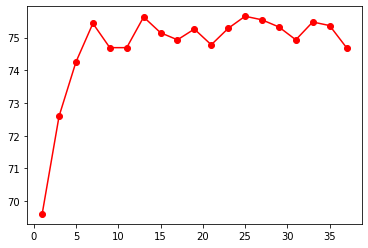

In [197]:
i=1
k=37
akurasi_total = 0
k_terbaik = 0
akurasi_terbaik = 0
arr_k = []
arr_akurasi = []

print("=========================================")
print("    K                Akurasi             ")
print("=========================================")   
while (i<(k+1)):
   
   data_akurasi = knn(dataset_1_train,dataset_1_test,i)
   data_akurasi_2 = knn(dataset_2_train,dataset_2_test,i)
   data_akurasi_3 = knn(dataset_3_train,dataset_3_test,i)
   data_akurasi_4 = knn(dataset_4_train,dataset_4_test,i)
   data_akurasi_5 = knn(dataset_5_train,dataset_5_test,i)
   
   akurasi_total = (data_akurasi[2]+data_akurasi_2[2]+data_akurasi_3[2]+data_akurasi_4[2]+data_akurasi_5[2])/5

   print("  ",i,"              ",akurasi_total)
   print("=========================================")
   arr_k.append(i)
   arr_akurasi.append(akurasi_total)
   if (akurasi_terbaik<akurasi_total):
     akurasi_terbaik=akurasi_total
     k_terbaik=i 
   i+=2
print()
print("K Terbaik = " , k_terbaik)
print("Akurasi Terbaik = ", akurasi_terbaik)
plt.plot(arr_k,arr_akurasi, 'ro-')
plt.show()